# All regression


In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import json

In [152]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

# Extract data
cols = df.columns
colsX = [col for col in cols if col != "MEDV"]

X = df[colsX].values
y = df["MEDV"].values


In [153]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [154]:
# Standardization (recommended for Ridge, Lasso and Elastic Net)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [155]:
def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)


In [156]:
def run_model(model, model_name, X_train, y_train, X_test, y_test, df):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    fig, ax = plt.subplots(
        1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
    )
    res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
    res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
    fig.supxlabel("Predicted values")
    fig.supylabel("Residual")

    df = store_results(
        df=df,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df


(354, 105)
(152, 105)


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Poly-2,4.103165,29.458341,0.951593,0.646212


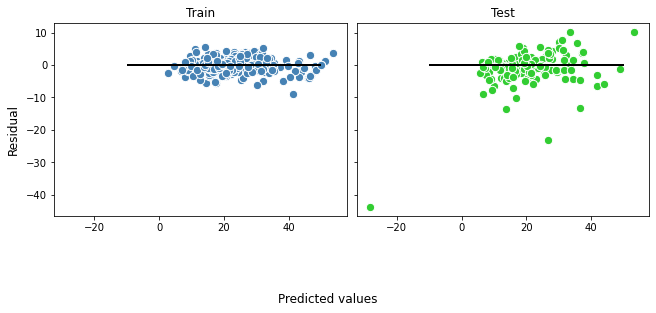

In [157]:
degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)
print(X_train_poly.shape)
print(X_test_poly.shape)

lr = LinearRegression()
dfAll = pd.DataFrame()
dfAll = run_model(
    model=lr,
    model_name=f"Poly-{degree}",
    X_train=X_train_poly,
    y_train=y_train,
    X_test=X_test_poly,
    y_test=y_test,
    df=dfAll,
)
display(dfAll)

In [158]:
ridge = Ridge(alpha=20)
svr = SVR(C=100, epsilon=0.1)
tree = DecisionTreeRegressor(max_depth=5)
forest = RandomForestRegressor(n_estimators=100, criterion="mse", random_state=1, n_jobs=-1)

models = [
    ('LR-Ridge', ridge),
    ('SVR', svr),
    ('Decision Tree', tree),
    ('Random Forest', forest)
]

,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Poly-2,4.103165,29.458341,0.951593,0.646212
1,LR-Ridge,20.252876,28.129191,0.761069,0.662175
2,SVR,1.883814,15.055162,0.977776,0.819191
3,Decision Tree,6.077440,26.254008,0.928302,0.684695
4,Random Forest,1.588353,14.703973,0.981262,0.823409


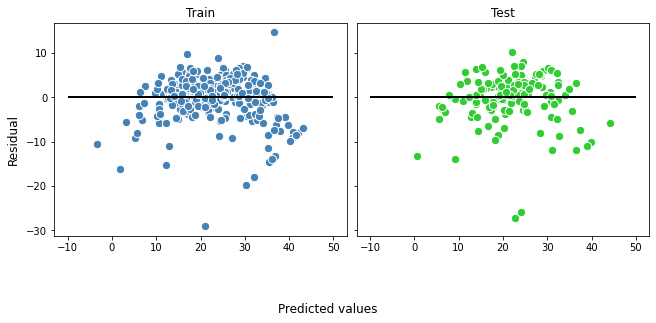

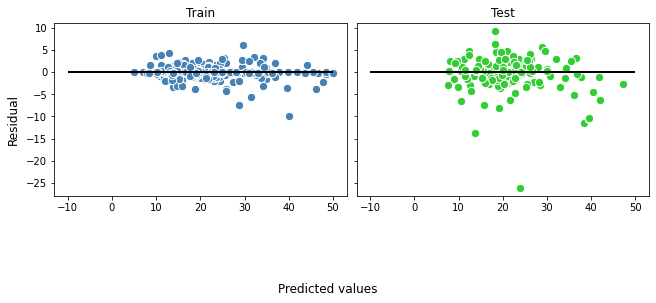

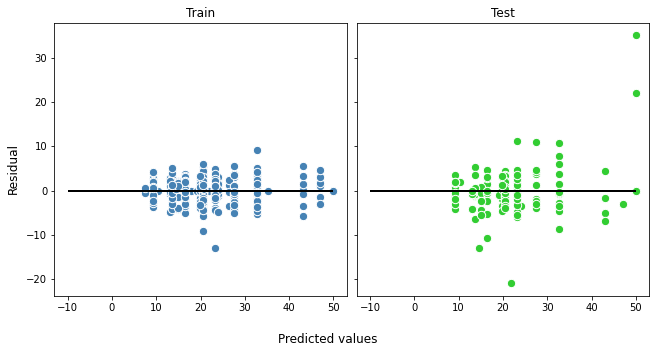

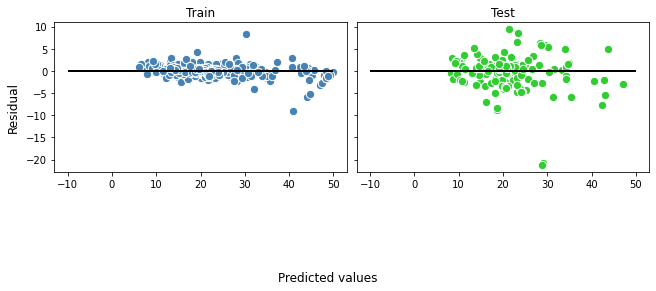

In [159]:
for name, model in models:
    dfAll = run_model(
        model=model,
        model_name=name,
        X_train=X_train_std,
        y_train=y_train,
        X_test=X_test_std,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)
